## **Import library and dataset**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datawrapper import Datawrapper

In [18]:
dw = Datawrapper(access_token = "qz9hLaCeh1pCwmvuqcyrjPCExTXFXgJhgEZTEk7eyOS273F1LYK8gzywUUeikHHi")

In [2]:
dataset = pd.read_csv("C:\Samuel\smt 5\ANALISIS BIG DATA\Tugas\Latihan 7\DataScience_Salaries_And_Fields.csv")
dataset.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_Currency,salary_in_usd,Salary_In_USD
0,1.0,2020-01-01,Data Scientist,MI,FT,6352272.0,DE,DE,L,0,NaN,NaN,6352272.0
1,NaN,2020-01-01,Principal Data Scientist,SE,FT,130000.0,DE,DE,M,100,EUR,148261.0,130000.0
2,NaN,2020-01-01,Lead Data Engineer,SE,FT,125000.0,NZ,NZ,S,50,USD,125000.0,125000.0
3,NaN,2020-01-01,Data Scientist,SE,FT,120000.0,US,US,L,50,USD,120000.0,120000.0
4,NaN,2020-01-01,Data Scientist,MI,FT,118000.0,US,US,M,100,USD,118000.0,118000.0


In [3]:
dataset.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
dataset.drop(columns=['Salary_In_Rupees'], axis=1, inplace=True)
dataset.drop(columns=['salary_in_usd'], axis=1, inplace=True)

In [4]:
dataset

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_Currency,Salary_In_USD
0,2020-01-01,Data Scientist,MI,FT,DE,DE,L,0,NaN,6352272.0
1,2020-01-01,Principal Data Scientist,SE,FT,DE,DE,M,100,EUR,130000.0
2,2020-01-01,Lead Data Engineer,SE,FT,NZ,NZ,S,50,USD,125000.0
3,2020-01-01,Data Scientist,SE,FT,US,US,L,50,USD,120000.0
4,2020-01-01,Data Scientist,MI,FT,US,US,M,100,USD,118000.0
...,...,...,...,...,...,...,...,...,...,...
15440,2024-01-01,Data Engineer,MI,FT,US,US,M,0,USD,167000.0
15441,2024-01-01,Data Analyst,MI,FT,US,US,M,0,USD,167000.0
15442,2024-01-01,Business Intelligence,MI,FT,US,US,M,0,USD,207600.0
15443,2024-01-01,Data Engineer,SE,FT,US,US,M,0,USD,208000.0


## **Data Preprocessing**

In [5]:
dataset.isnull().sum()

Working_Year              0
Designation               0
Experience                0
Employment_Status         0
Employee_Location         0
Company_Location          0
Company_Size              0
Remote_Working_Ratio      0
Salary_Currency         607
Salary_In_USD             0
dtype: int64

In [6]:
dataset["Salary_Currency"].fillna(dataset["Salary_Currency"].mode()[0], inplace=True)

C:\Users\Samuel Chinson\AppData\Local\Temp\ipykernel_22400\170315915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Salary_Currency"].fillna(dataset["Salary_Currency"].mode()[0], inplace=True)


In [7]:
dataset['Salary_In_USD'] = dataset['Salary_In_USD'].astype(int)

## **EDA**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15445 entries, 0 to 15444
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          15445 non-null  object
 1   Designation           15445 non-null  object
 2   Experience            15445 non-null  object
 3   Employment_Status     15445 non-null  object
 4   Employee_Location     15445 non-null  object
 5   Company_Location      15445 non-null  object
 6   Company_Size          15445 non-null  object
 7   Remote_Working_Ratio  15445 non-null  int64 
 8   Salary_Currency       15445 non-null  object
 9   Salary_In_USD         15445 non-null  int32 
dtypes: int32(1), int64(1), object(8)
memory usage: 1.1+ MB


In [9]:
avg_salary_by_company_size = dataset.groupby('Company_Size')['Salary_In_USD'].mean()
print(avg_salary_by_company_size)

Company_Size
L    1.711217e+06
M    3.640315e+05
S    2.011631e+06
Name: Salary_In_USD, dtype: float64


In [10]:
class_counts = dataset['Designation'].value_counts()
print(class_counts)

Designation
Data Engineer                      3294
Data Scientist                     3158
Data Analyst                       2286
Machine Learning Engineer          1583
Research Scientist                  491
                                   ... 
Power BI Developer                    1
Marketing Data Engineer               1
Staff Machine Learning Engineer       1
Sales Data Analyst                    1
Data Analytics Associate              1
Name: count, Length: 156, dtype: int64


# **Insight**

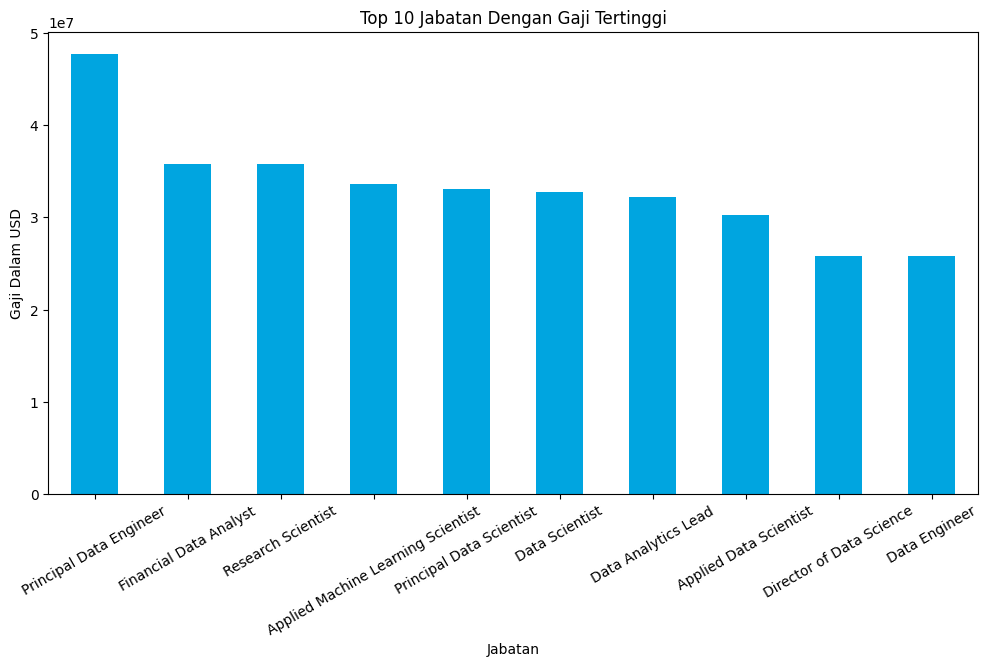

In [11]:
designation_grouping = dataset.groupby('Designation')['Salary_In_USD'].max()
top_10_designation = designation_grouping.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_designation.plot(kind='bar', color='#00A5E0')
plt.title('Top 10 Jabatan Dengan Gaji Tertinggi')
plt.xlabel('Jabatan')
plt.ylabel('Gaji Dalam USD')
plt.xticks(rotation=30)
plt.show()

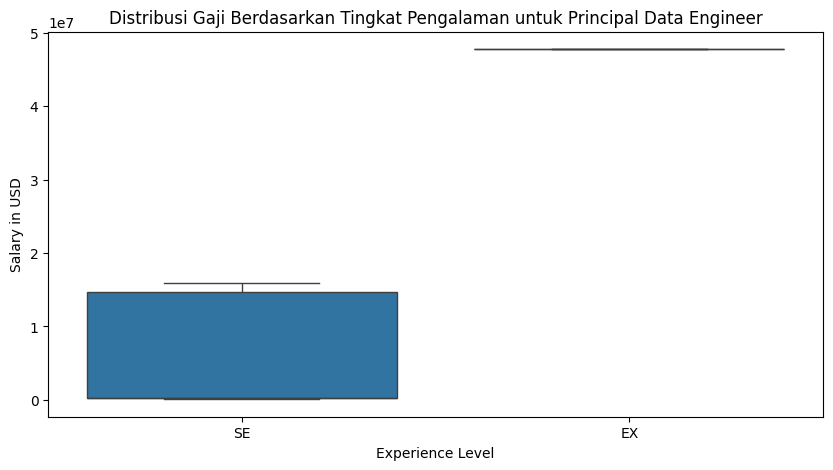

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experience', y='Salary_In_USD', data=dataset[dataset['Designation'] == 'Principal Data Engineer'])
plt.title("Distribusi Gaji Berdasarkan Tingkat Pengalaman untuk Principal Data Engineer")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

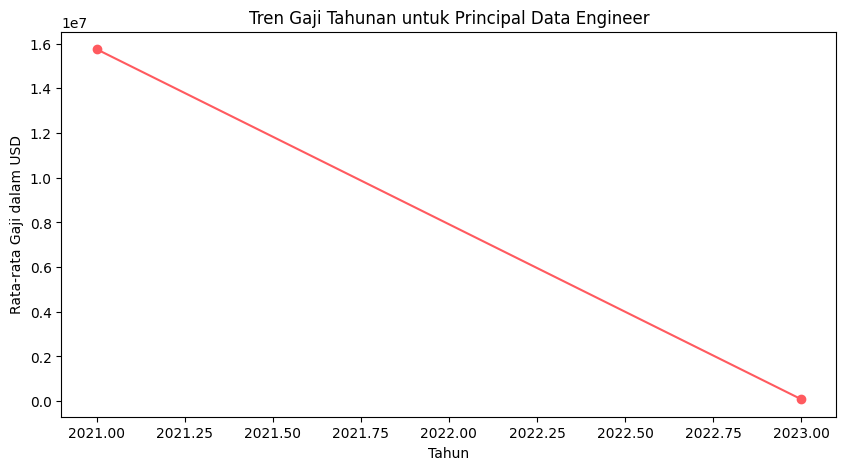

In [20]:
# Kode visualisasi untuk tren gaji berdasarkan tahun
dataset['Working_Year'] = pd.to_datetime(dataset['Working_Year'], errors='coerce')
principal_trend = dataset[dataset['Designation'] == 'Principal Data Engineer']
principal_trend = principal_trend.groupby(principal_trend['Working_Year'].dt.year)['Salary_In_USD'].mean()

plt.figure(figsize=(10, 5))
principal_trend.plot(kind='line', marker='o', color='#FF5A5F')
plt.title("Tren Gaji Tahunan untuk Principal Data Engineer")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Gaji dalam USD")
plt.show()